# Mentale Gezondheid


In het dagelijks gebruik zijn sociale media niet weg te krijgen. Het is een nieuwe norm geworden, wanneer men iets ziet dat te delen online. Vroeger had men vooral contact als ze elkaar fysiek zagen. Dat geeft ook een druk op mensen om altijd beschikbaar te zijn. In die tijd zouden ze eigenlijk met andere dingen bezig moeten zijn. Hun aandacht, focus en behoeftes worden geschoven, wat zorgt voor een verschuiving in prioriteiten. Een argument daarbij is dan ook dat het gebruik van sociale media diversie problemen veroorzaakt, zoals slechter presteren op school, slaapproblemen en internetverslaving.


### Schoolprestatie

Studenten zijn al langer bekend om gevoelig te zijn voor mentale stoornissen. Door hoge studielast, sociale druk en financiële moeilijkheden staan zijn erg onder druk. Ook zijn jongeren meer actief op sociale media en worden daardoor ook beïnvloed. Veel studenten geven aan dat hun studieprestaties negatief worden beïnvloed door sociale media. Studenten die aangeven academisch beïnvloed te worden, gebruiken sociale media vaker. 

Path to dataset files: /home/noor/.cache/kagglehub/datasets/adilshamim8/social-media-addiction-vs-relationships/versions/3


/tmp/ipykernel_13532/1989849081.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


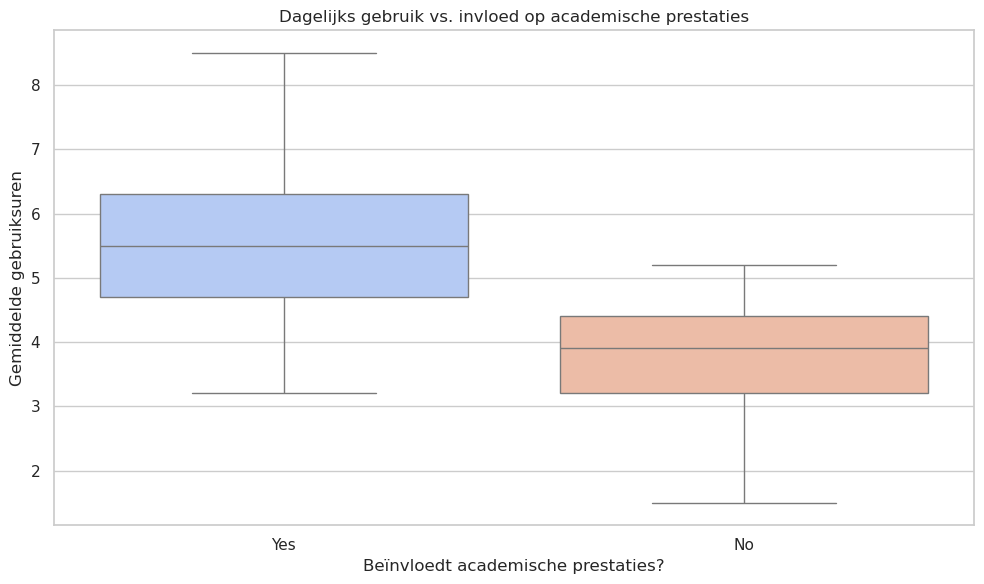

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
import os

import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")

print("Path to dataset files:", path)
csv_path = os.path.join(path, "Students Social Media Addiction.csv") 
df4 = pd.read_csv(csv_path)

# Algemene stijl
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

plt.figure()
sns.boxplot(
    data=df4,
    x="Affects_Academic_Performance",
    y="Avg_Daily_Usage_Hours",
    palette="coolwarm"
)
plt.title("Dagelijks gebruik vs. invloed op academische prestaties")
plt.xlabel("Beïnvloedt academische prestaties?")
plt.ylabel("Gemiddelde gebruiksuren")
plt.tight_layout()
plt.show()

> *Figuur 2: De correlatie tussen het de gemiddelde gebruiksuren van sociale media en of de student vind dat de acadmische prestatie worden beïnvloed.*

In de tekst boven is de data te zien van studenten die aangeven of hun academische prestaties worden aangetast door het overmatig gebruik van sociale media. In de linker kolom is een significant hoger aantal studenten te zien die wel vindt dat zijn of haar scores minderen. Uit zelf reflectie is een punt te halen dat sociale media een probleem is en niet een vrijwillige actie is. De mentale gezondheid van de student kan hier ook onder lijden door de algoritmes van de apps.

In [3]:
import pandas as pd
import plotly.graph_objects as go

# Laad data
df = pd.read_csv("MentalHealthSurvey.csv")

# Schoon CGPA-categorieën op
df['cgpa'] = df['cgpa'].str.strip()

# Relevante mentale gezondheidsdimensies
mental_columns = ['depression', 'anxiety', 'isolation', 'future_insecurity', 'academic_pressure']

# Bereken gemiddelden per CGPA-groep
grouped = df.groupby('cgpa')[mental_columns].mean()

# Sorteer in logische volgorde
cgpa_order = ['<2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0']
grouped = grouped.loc[[g for g in cgpa_order if g in grouped.index]]

# Maak radar chart
fig = go.Figure()

for cgpa in grouped.index:
    fig.add_trace(go.Scatterpolar(
        r=grouped.loc[cgpa].values,
        theta=mental_columns,
        fill='toself',
        name=f'CGPA {cgpa}'
    ))

fig.update_layout(
    title='Mentale Gezondheid per CGPA-groep',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5]
        )
    ),
    showlegend=True
)

fig.show()



FileNotFoundError: [Errno 2] No such file or directory: 'MentalHealthSurvey.csv'

> *Figuur 3: Weergave van de effecten van verschillende effecten op de gemiddeld behaalde cijfers van studenten.*

Zoals eerder benoemd heeft academische druk niet alleen gevolgen op de academische scores maar ook de mentale gezondheid van studenten. Studenten die meer werken voor hoge cijfers hebben sneller last van mentale klachten zoals depressie en stress. Ook is af te lezen dat studenten lagere cijfers sneller geneigd zijn om onzeker te zijn. De studententijd is een tijd waar mensen zich kunnen ontwikkelen en groeien tot de persoon die ze met zelfverzekerheid willen worden. Ook is de prestatiedruk voor studenten met lage cijfer immens hoog.

### Sociale Media

Daarnaast scoren studenten met een hoger dagelijks gebruik vaak lager op mentale gezondheid. Meer gebruik hangt vaak samen met een lagere mentale gezondheidsscore 

In [23]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
import kagglehub

path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")
csv_path = os.path.join(path, "Students Social Media Addiction.csv")
df = pd.read_csv(csv_path)
df = df.dropna(subset=["Avg_Daily_Usage_Hours", "Mental_Health_Score", "Gender"])

genders = ["Male", "Female"]
colors = {"Male": "blue", "Female": "deeppink", "All": "green"}

# Functie om scatter + regressielijn trace te maken
def get_traces(gender=None):
    if gender:
        d = df[df["Gender"] == gender]
        label = gender
    else:
        d = df
        label = "All"

    # Regressielijn berekenen
    x = d["Avg_Daily_Usage_Hours"]
    y = d["Mental_Health_Score"]
    slope, intercept = np.polyfit(x, y, 1)
    x_vals = np.linspace(x.min(), x.max(), 100)
    y_vals = slope * x_vals + intercept

    # Scatter trace
    scatter = go.Scatter(
        x=x, y=y,
        mode='markers',
        name=f"{label} - data",
        marker=dict(color=colors[label], opacity=0.6),
        showlegend=True
    )

    # Lijn trace
    line = go.Scatter(
        x=x_vals, y=y_vals,
        mode='lines',
        name=f"{label} - trend",
        line=dict(color=colors[label], width=2, ),
        showlegend=True
    )

    return scatter, line

# Maak alle traces aan (elk 2: scatter + line)
male_traces = get_traces("Male")
female_traces = get_traces("Female")
all_traces = get_traces(None)
all_plot_traces = [*male_traces, *female_traces, *all_traces]

# Dropdown menu logica
buttons = [
    dict(label="Mannen",
         method="update",
         args=[{"visible": [True, True, False, False, False, False]},
               {"title": "Social media gebruik vs. mentale gezondheid (mannen)"}]),
    dict(label="Vrouwen",
         method="update",
         args=[{"visible": [False, False, True, True, False, False]},
               {"title": "Social media gebruik vs. mentale gezondheid (vrouwen)"}]),
    dict(label="Iedereen",
         method="update",
         args=[{"visible": [False, False, False, False, True, True]},
               {"title": "Social media gebruik vs. mentale gezondheid (alle studenten)"}])
]

# Plot figuur
fig = go.Figure(data=all_plot_traces)

fig.update_layout(
    title="Social media gebruik vs. mentale gezondheid",
    xaxis_title="Gemiddeld aantal gebruiksuren van social media per dag",
    yaxis_title="Mentale gezondheidsscore",
    updatemenus=[dict(active=0, buttons=buttons, x=1.15)]
)

fig.show()

> *Figure 4: Gebruik van sociale media en de mentale gezondheid van mannen en vrouwen.*

De bovenstaande grafiek toont het verband tussen de gemiddelde dagelijkse social media uren en de mentale gezondheidsscore van studenten. Er is een duidelijke negatieve trend zichtbaar in de regessielijn, bij zowel mannen als vrouwen. De mentale gezondheidsscoren daalt naarmate het aantal social media uren meer wordt. Dit betekent dat hoe meer tijd studenten gemiddeld per dag op social media doorbrengen, hoe lager hun mentale gezondheidsscore gemiddeld is, dus meer social media gebruik hangt samen met slechtere mentale gezondheid.

### Slaapgedrag

Mentale gezondheid wordt sterk beïnvloedt door het slaapgedrag.

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import os
import kagglehub

# Download dataset
path = kagglehub.dataset_download("uom190346a/mental-health-diagnosis-and-treatment-monitoring")
print("Path to dataset files:", path)

# Laad CSV-bestand
csv_path = os.path.join(path, "Students Social Media Addiction.csv")
df = pd.read_csv(csv_path)

# Verken de kolomnamen
print(df.columns)

# Voorbeeld: filter studenten tussen 18 en 25 jaar
df_filtered = df[(df['Age'] >= 18) & (df['Age'] <= 25)]

# Plot: stress vs slaapkwaliteit per gender
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x="Stress Level (1-10)",
    y="Sleep Quality (1-10)",
    hue="Gender",
    alpha=0.7,
    palette="cool"
)
plt.title("Stressniveau vs. slaapkwaliteit (per geslacht)")
plt.xlabel("Stressniveau (1-10)")
plt.ylabel("Slaapkwaliteit (1-10)")
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'plotly'

> *Figure 8: Verschil per geslacht over gebruiksuren en slaapuren.*

## Sport Gewoontes

In [ ]:
import kagglehub
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Download latest version
path = kagglehub.dataset_download("abdullahashfaqvirk/student-mental-health-survey")

# print("Path to dataset files:", path)

csv_path = os.path.join(path, "MentalHealthSurvey.csv") 
df = pd.read_csv(csv_path)
# print(df.head(n=5))

df['sports_engagement'] = pd.Categorical(
    df['sports_engagement'],
    categories=['No Sports','1-3 times', '4-6 times', '7+ times'],
    ordered=True
)
depressie_level = df['depression']
stress_level = df['anxiety']
slaap_level = df['average_sleep']
isolatie = df['isolation']

fig = go.Figure()

fig.add_trace(go.Box(
    x=df['sports_engagement'],
    y=stress_level
))
fig.update_layout(
    title = 'Stress en Sportgewoontes',
    xaxis_title = 'sport level',
    yaxis_title = 'stress',
    xaxis=dict(
        categoryorder='array',
        categoryarray=['No Sports', '1-3 times', '4-6 times', '7+ times']
    )
)

fig.show()

